In [1]:
import fastbook
from fastbook import *
from fastai.vision.all import *

/opt/conda/lib/python3.7/site-packages/fastbook/__init__.py:19: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


In [2]:
fastbook.setup_book()

In [3]:
path = untar_data(URLs.MNIST)
dls = ImageDataLoaders.from_folder(path,train='training', valid='testing')

In [4]:
learn = cnn_learner(dls, resnet18, pretrained=False, loss_func=LabelSmoothingCrossEntropy(), metrics=accuracy)

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [5]:
!pip install mlflow

In [6]:
# Import mlflow
import mlflow

In [7]:
mlflow.set_tracking_uri("http://172.23.180.10:30534")

In [8]:
mlflow.set_experiment("fastai_mnist")

In [25]:
#learn.fit_one_cycle(2, 0.1)

epochs = 10
learning_rate = 0.1

with mlflow.start_run(run_name="today-3"):
  mlflow.log_param('epochs', epochs)  
  mlflow.log_param('learning rate', learning_rate)

  learn.fit_one_cycle(epochs, learning_rate)
  
  avgMetric = learn.recorder.metrics
  print(avgMetric)  # a list
  print(avgMetric[0]) # an object
  print(avgMetric[0].value) # Tensor
  print(avgMetric[0].value.item()) # float

  mlflow.log_metric('accuracy', avgMetric[0].value.item())

epoch,train_loss,valid_loss,accuracy,time
0,0.572959,0.547083,0.991100,00:32
1,0.805013,0.762752,0.980400,00:31
2,1.555703,127559.515625,0.929700,00:32
3,1.741888,1.779914,0.826200,00:31
4,0.749658,0.625095,0.983300,00:31
5,0.622390,1.472117,0.883700,00:32
6,0.578453,0.544016,0.990500,00:32
7,0.547019,0.526053,0.991400,00:32
8,0.520966,0.514922,0.994900,00:31
9,0.514616,0.511739,0.995300,00:31


TensorBase(0.9953)
0.9952999949455261


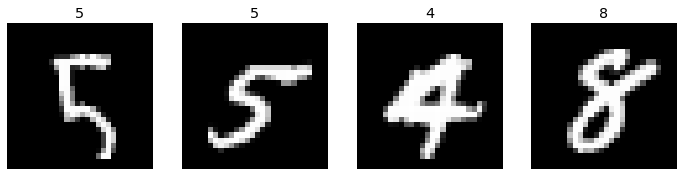

In [10]:
#show a batch of training data
dls.train.show_batch(max_n=4, nrows=1)

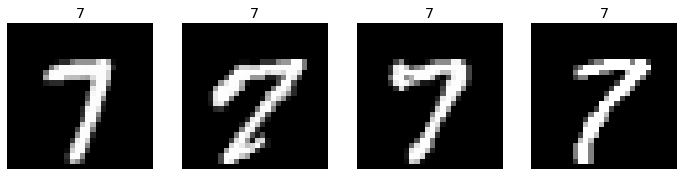

In [11]:
#show a tatch of validation data
dls.valid.show_batch(max_n=4, nrows=1)

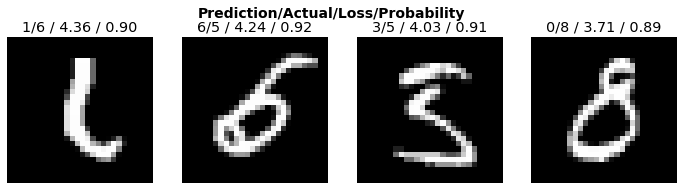

In [12]:
#show the images with the highest loss
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(4, nrows=1)

In [13]:
learn.summary()

Sequential (Input shape: 64)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 14 x 14   
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                      

In [14]:
learn.export("fastai_mnist_model_export.pkl")